In [ ]:
#Importando as libs/bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Lendo a base de dados / data frame:
Base_Dados = pd.read_csv('Startups+in+2021+end.csv')

In [ ]:
#Verificando a dimensão do arquivo a ser trabalhado:
Base_Dados.shape

(936, 8)

In [ ]:
#Verificando os primeiros registros do arquivo:
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# Tratando a lista | Renomeando as colunas:
Base_Dados.rename(columns={
    'Unnamed: 0' : 'ID',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors': 'Investidores'
}, inplace=True )

In [ ]:
#Verificando os tipos de informações das colunas:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#Verificando os campos nulos:
Base_Dados.isnull().sum()

ID                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

<Axes: title={'center': 'Campos Nulos'}>

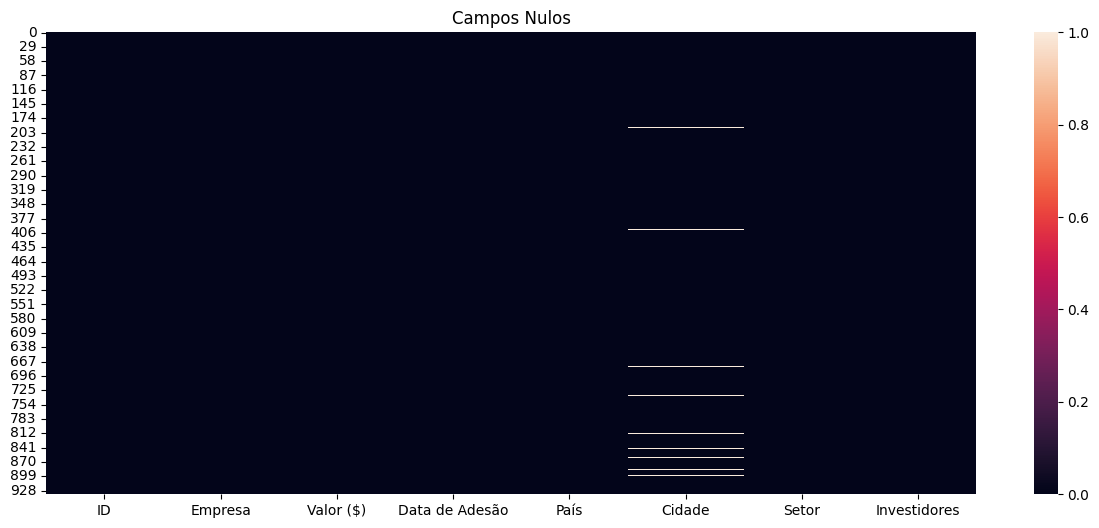

In [ ]:
#Visão gráfica:
plt.figure(figsize=(15,6))
plt.title('Campos Nulos')
sns.heatmap(Base_Dados.isnull())

In [ ]:
#Campos únicos:
Base_Dados.nunique()

ID                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [ ]:
#Verificando cada valor único selecionando a coluna:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
#Valores Únicos - Em rank de quantidades:
Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [ ]:
#Verificando valores únicos em rank por porcentagens:
Base_Dados['Setor'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

<BarContainer object of 17 artists>

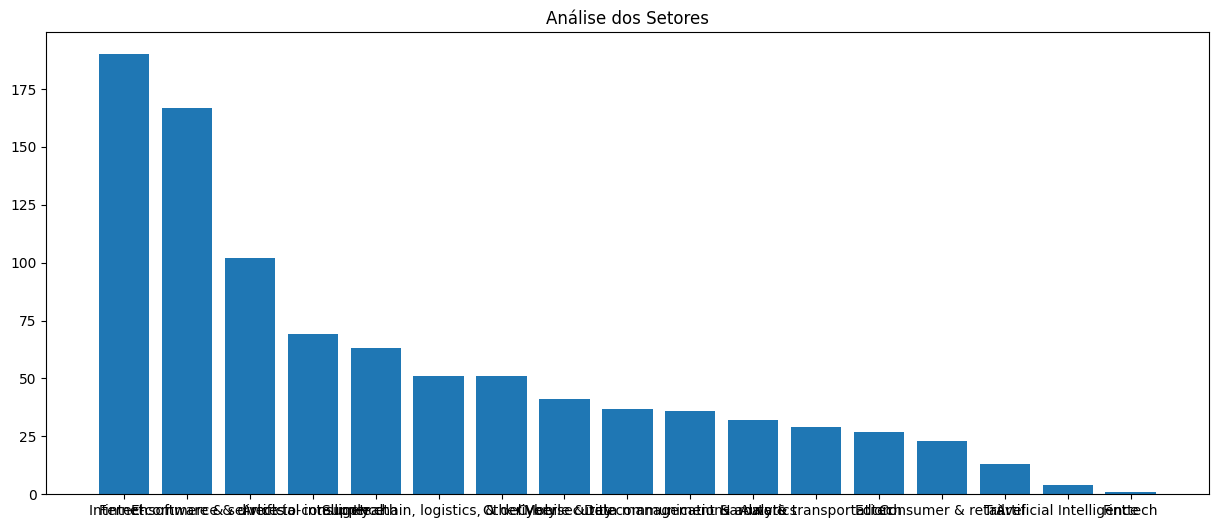

In [ ]:
#Verificando em gráfico de barras a análise dos setores:
plt.figure(figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Fintech'),
  Text(1, 0, 'Internet software & services'),
  Text(2, 0, 'E-commerce & direct-to-consumer'),
  Text(3, 0, 'Artificial intelligence'),
  Text(4, 0, 'Health'),
  Text(5, 0, 'Supply chain, logistics, & delivery'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Cybersecurity'),
  Text(8, 0, 'Mobile & telecommunications'),
  Text(9, 0, 'Data management & analytics'),
  Text(10, 0, 'Hardware'),
  Text(11, 0, 'Auto & transportation'),
  Text(12, 0, 'Edtech'),
  Text(13, 0, 'Consumer & retail'),
  Text(14, 0, 'Travel'),
  Text(15, 0, 'Artificial Intelligence'),
  Text(16, 0, 'Finttech')])

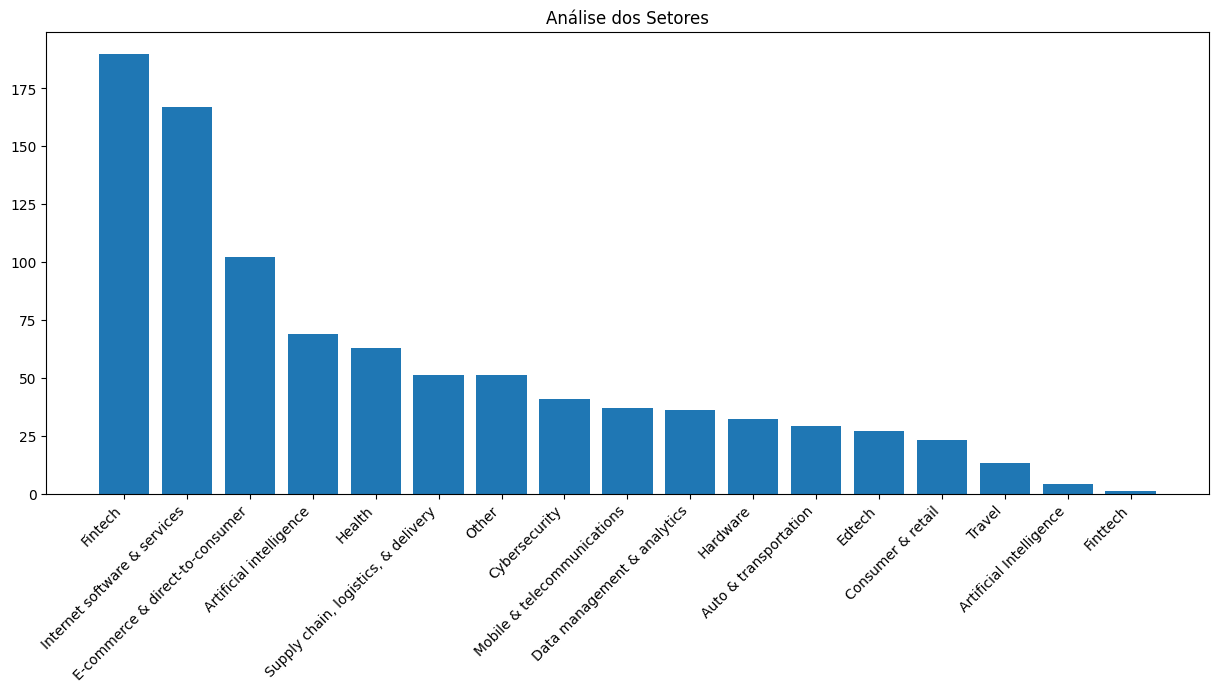

In [ ]:
#Corrigindo a posição da mensagem embaixo do gráfico:
plt.figure(figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right')

In [ ]:
#Analisando o gráfico e tratando a porcentagem:
Analise = Base_Dados['País'].value_counts(normalize=True) * 100
Analise


United States           50.961538
China                   18.055556
India                    5.448718
United Kingdom           3.952991
Germany                  2.457265
Israel                   2.243590
France                   2.029915
Canada                   1.602564
Brazil                   1.602564
South Korea              1.175214
Singapore                1.175214
Hong Kong                0.747863
Japan                    0.641026
Australia                0.641026
Mexico                   0.534188
Netherlands              0.534188
Indonesia                0.427350
Spain                    0.427350
Sweden                   0.427350
Switzerland              0.427350
Ireland                  0.320513
United Arab Emirates     0.320513
Norway                   0.320513
Belgium                  0.213675
Thailand                 0.213675
Denmark                  0.213675
Philippines              0.213675
Finland                  0.213675
Colombia                 0.213675
South Africa  

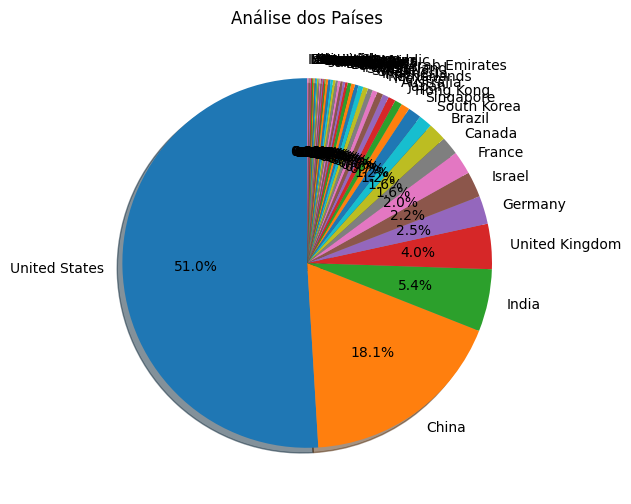

In [ ]:
#Fazendo análise com o gráfico pie/pizza:
plt.figure(figsize=(15,6))
plt.title('Análise dos Países')
plt.pie(
    Analise,
    labels=Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

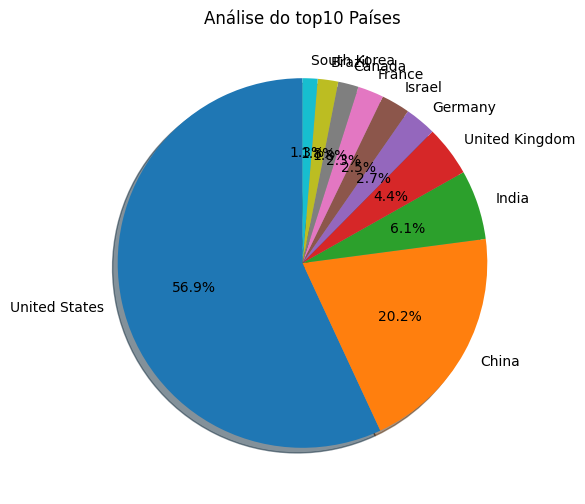

In [ ]:
#Fazendo análise com o gráfico pie/pizza porém apenas com os 10 primeiros da lista:
plt.figure(figsize=(15,6))
plt.title('Análise do top10 Países')
plt.pie(
    Analise.head(10),
    labels=Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [ ]:
#Conversão de tipo de valores object para date:
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])

#OBS: Está informando ao pandas que na Base_Dados a coluna 'Data de Adesão precisa ser transformada (pd.to_datetime) para tempo de data, e informa qual a base e coluna novamente: Base_Dados['Data de Adesão']


In [ ]:
#Extraindo o Ano e Mês:
Base_Dados['Mês'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year
Base_Dados.head()

#OBS: Criou duas novas colunas 'Mês' e 'Ano' onde usa o pandas para informar o mês'month' e ano 'year'.

,ID,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#Tabela Analítica:
Analise_Agrupada = Base_Dados.groupby(by=['País', 'Ano', 'Mês']).count()['ID'].reset_index()
Analise_Agrupada

,País,Ano,Mês,ID
0,Argentina,2021,8,1
1,Australia,2018,1,1
2,Australia,2019,3,1
3,Australia,2021,5,1
4,Australia,2021,7,2
...,...,...,...,...
373,United States,2021,10,26
374,United States,2021,11,30
375,United States,2021,12,8
376,"United States,",2021,9,1


In [ ]:
#Verificando apenas a tabela onde País = Brazil:
Analise_Agrupada.loc[
    Analise_Agrupada['País'] == 'Brazil'
]

,País,Ano,Mês,ID
11,Brazil,2018,3,1
12,Brazil,2018,7,1
13,Brazil,2018,11,1
14,Brazil,2019,6,1
15,Brazil,2019,9,1
16,Brazil,2019,10,1
17,Brazil,2019,12,1
18,Brazil,2020,1,1
19,Brazil,2020,12,2
20,Brazil,2021,1,1


In [ ]:
#Retirando o símbolo $ nos valores:
Base_Dados['Valor ($)'].apply(lambda Linha: Linha.replace('$', ''))

0        140
1      100.3
2         95
3       45.6
4         40
       ...  
931        1
932        1
933        1
934        1
935        1
Name: Valor ($), Length: 936, dtype: object

In [ ]:
#Caso queira alterar esse simbolo para R$:
#Base_Dados['Valor ($)'].apply(lambda Linha: Linha.replace('$', 'R$'))
